<a href="https://colab.research.google.com/github/yahyaahmedkhann/predicting-disease-initial/blob/main/health_disease_fyp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Disease Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has disease based on their medical attributes.

Approach we're going to take :

Problem definition
Data
Evaluation
Features
Modelling
Experimentation

## 1. Problem Definition

In a statement,

Given clinical parameters about a patient, can we predict whether or not they have disease?

## 2. Data
The data came from
https://drive.google.com/file/d/10ogdjtaWNwE3RBCc6nsHXOFdZuqU0GNG/view?usp=drive_link

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has a disease.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset)
1. Age -
2. Gender - Male or Female
3. Temperature -
4. Heart Rate (Beats Per Minute)
5. SPO2 - Blood Oxygen
6. Diagnosis
7. Result

### 5. Results
1. `Acute Gastroenteritis (AGE)` - Inflammation of stomach and intestine
2. ⁠`Upper Respiratory Tract Infection (URTI)` - Viral infection that effects upper respiratory tract, including throat, nose etc
3. ⁠`Generalized Anxiety Disorder (GAD)` - Mental Disorder in which person is stressed about various things
4. ⁠`Gastroesophageal Reflux Disease (GERD)` - Condition in which stomach acid repeatedly flows back up into the tube containing the mout and stomach
5. ⁠`Functional Dyspepsia (FD)` - Medical term for chronic indigestion
6. `Hyperemic` - More blood than normal going into the body tissues and organs
7. `Fever` - Body Temperature is higher than average temperature


### 6.  Diagnosis and Result Mappings

#### **Diagnosis Mapping**

| Diagnosis         | Code |
|-------------------|------|
| Fever             | 1    |
| Loose Motion      | 2    |
| Vomiting          | 3    |
| Cough             | 4    |
| Abdominal Pain    | 5    |
| Epigastric Pain   | 6    |
| Sore Throat       | 7    |
| Headache          | 8    |
| Breathlessness    | 9    |
| Flu               | 10   |
| Dysuria            | 11   |
| Nausea            | 12   |
| Chest Pain        | 13   |
| Bodyache          | 14   |
| Dizziness         | 15   |

#### **Diagnosis_2 Mapping**

| Diagnosis_2       | Code |
|-------------------|------|
| Vomiting          | 3    |
| Sore Throat       | 7    |
| Bodyache          | 14   |
| Nausea            | 12   |
| Cough             | 4    |
| Loose Motion      | 2    |
| Fever             | 1    |
| Abdominal Pain    | 5    |
| Flu               | 10   |
| Epigastric Pain   | 6    |
| Headache          | 8    |
| Weakness          | 16   |
| Breathlessness    | 9    |
| Chest Pain        | 13   |
| Dizziness         | 15   |

#### **Result Mapping**

| Result            | Code |
|-------------------|------|
| Age               | 17   |
| URTI              | 18   |
| Fever             | 19   |
| FD                | 20   |
| Hyperemic         | 21   |
| GAD               | 22   |
| GERD              | 23   |


## Preparing & Importing the tools
We're going to use pandas, Matplotlib and NumPy for data analysis and manipulation

In [90]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [91]:
df = pd.read_csv("/content/drive/MyDrive/dataset/fyp_dataset_cleaned.csv", encoding="latin1")
df.shape # rows and columns

(378, 8)

In [92]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


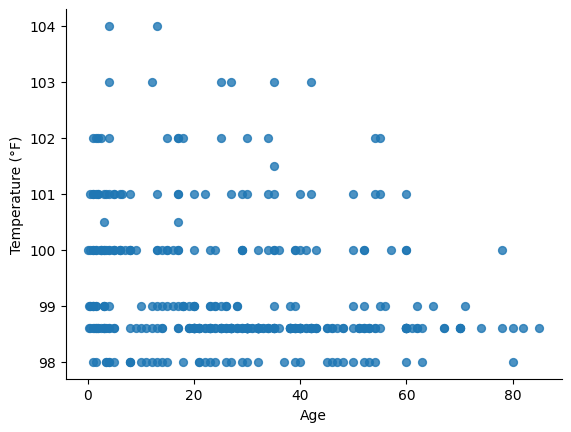

In [93]:
# @title Age vs Temperature (°F)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Age', y='Temperature (°F)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [94]:
df.tail()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
373,60.0,female,98.6,85.0,98,loose motion,bodyache,age
374,32.0,male,98.6,76.0,99,abdominal pain,bodyache,fd
375,65.0,female,99.0,84.0,99,dizziness,nausea,fd
376,13.0,female,104.0,70.0,99,loose motion,vomiting,age
377,31.0,female,98.6,91.0,97,loose motion,vomiting,age


In [95]:
# Let's find out how many of each class there
df["Result"].value_counts()


Result
age          135
urti          94
fever         72
fd            29
hyperemic     18
gad           15
gerd          15
Name: count, dtype: int64

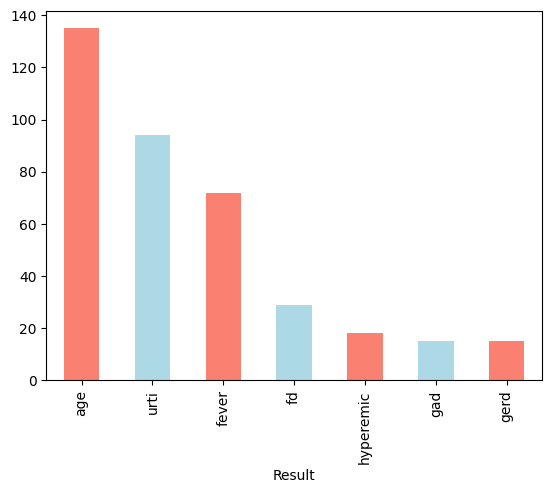

In [96]:
df["Result"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);


In [97]:
# Are there any missing values?
df.isna().sum()


Age                 0
Gender              0
Temperature (°F)    0
Heart Rate (bpm)    0
SPO2 (%)            0
Diagnosis           0
Diagnosis_2         0
Result              0
dtype: int64

In [98]:
df.describe()

,Age,Temperature (°F),Heart Rate (bpm),SPO2 (%)
count,378.000000,378.000000,378.000000,378.000000
mean,27.701455,99.222487,99.736232,97.798942
std,19.576981,1.163092,17.559372,1.688406
min,0.100000,98.000000,58.000000,86.000000
25%,12.000000,98.600000,90.250000,98.000000
50%,27.000000,98.600000,99.736232,98.000000
75%,40.000000,100.000000,110.000000,99.000000
max,85.000000,104.000000,163.000000,100.000000


# Disease Frequency According to Gender

In [99]:
df.Gender.value_counts()

Gender
female    245
male      133
Name: count, dtype: int64

In [100]:
# Compare Result column with Gender column
pd.crosstab(df.Result, df.Gender)


Gender,female,male
Result,,
age,102,33
fd,23,6
fever,34,38
gad,12,3
gerd,7,8
hyperemic,10,8
urti,57,37


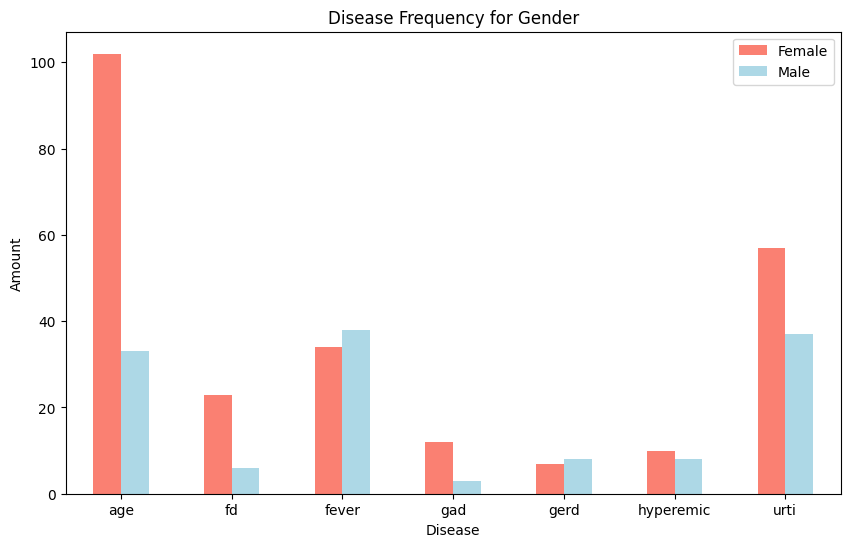

In [101]:
# Create a plot of crosstab
pd.crosstab(df.Result, df.Gender).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"]);

plt.title("Disease Frequency for Gender")
plt.xlabel("Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

# Age vs Heart Rate for Disease

In [102]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


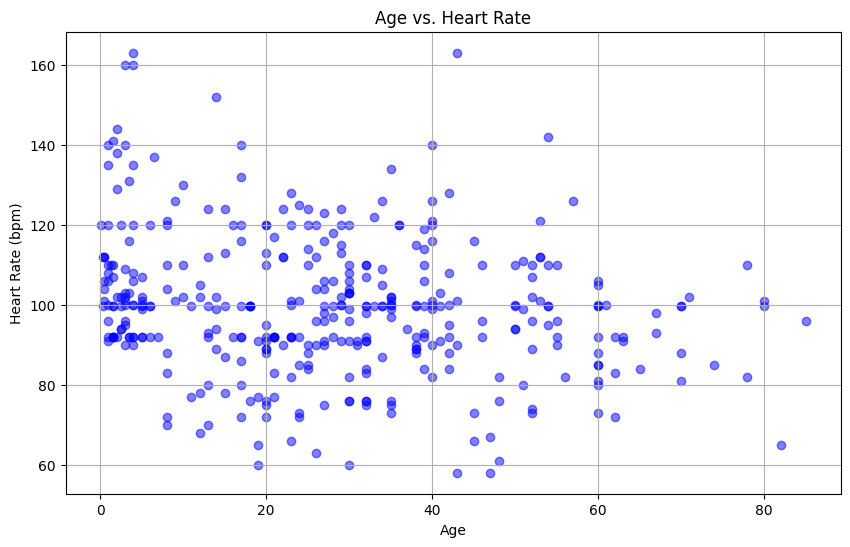

In [103]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Heart Rate (bpm)'], c='blue', alpha=0.5)
plt.title('Age vs. Heart Rate')
plt.xlabel('Age')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)
plt.show()

In [104]:
df.Age.value_counts().head(20)

Age
30.0    15
32.0    14
20.0    13
60.0    12
35.0    11
4.0     11
17.0    10
40.0    10
3.0     10
27.0    10
23.0     9
1.5      9
39.0     8
29.0     8
5.0      8
38.0     8
25.0     8
8.0      8
21.0     7
13.0     7
Name: count, dtype: int64

In [105]:
df.Age.value_counts().tail()

Age
74.0    1
71.0    1
7.0     1
37.0    1
65.0    1
Name: count, dtype: int64

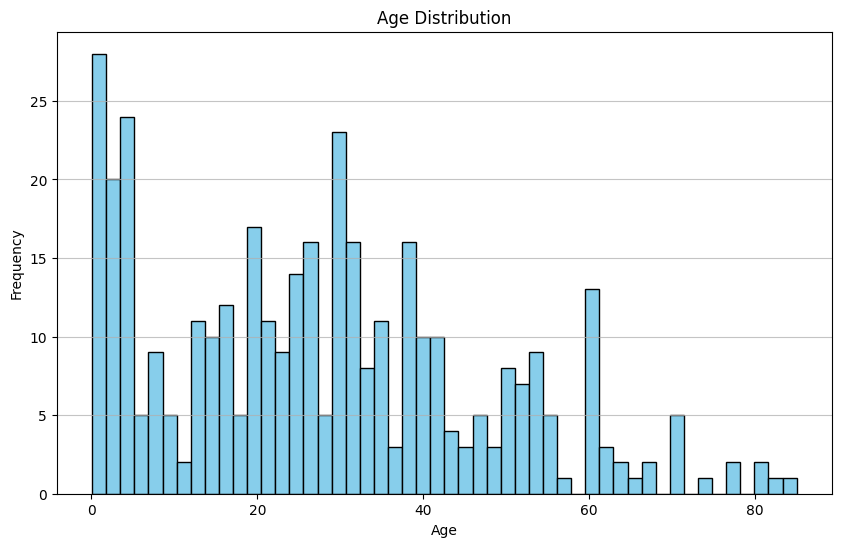

In [106]:
# Check the distribution of the age column with a histrogram
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=50, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [107]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


Correlation between Age and Heart Rate: -0.21305940543794702
Correlation between Age and SPO2: -0.08027155778313785
Correlation between Age and Temperature: -0.22426168301351046


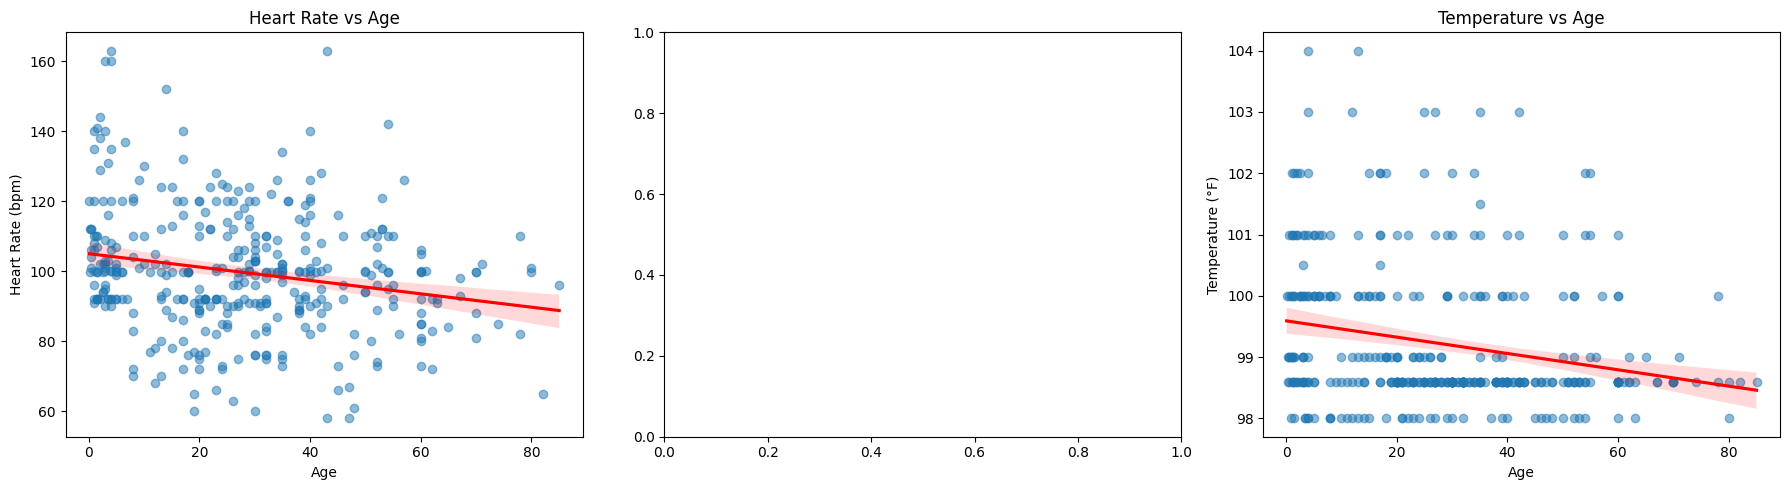

In [108]:
# Calculate correlation coefficients
correlation_hr = df['Age'].corr(df['Heart Rate (bpm)'])
correlation_spo2 = df['Age'].corr(df['SPO2 (%)'])
correlation_temp = df['Age'].corr(df['Temperature (°F)'])

print(f'Correlation between Age and Heart Rate: {correlation_hr}')
print(f'Correlation between Age and SPO2: {correlation_spo2}')
print(f'Correlation between Age and Temperature: {correlation_temp}')

# Plotting scatter plots with trend lines
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Heart Rate vs Age
sns.regplot(x='Age', y='Heart Rate (bpm)', data=df, ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[0].set_title('Heart Rate vs Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Heart Rate (bpm)')



# Temperature vs Age
sns.regplot(x='Age', y='Temperature (°F)', data=df, ax=axes[2], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
axes[2].set_title('Temperature vs Age')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Temperature (°F)')

plt.tight_layout()
plt.show()

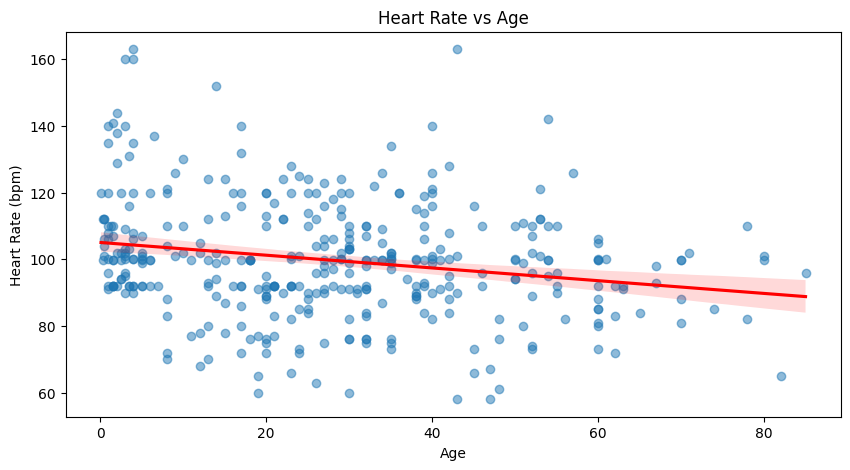

In [109]:
# Plot Heart Rate vs Age
plt.figure(figsize=(10, 5))
sns.regplot(x='Age', y='Heart Rate (bpm)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Heart Rate vs Age')
plt.xlabel('Age')
plt.ylabel('Heart Rate (bpm)')
plt.show()


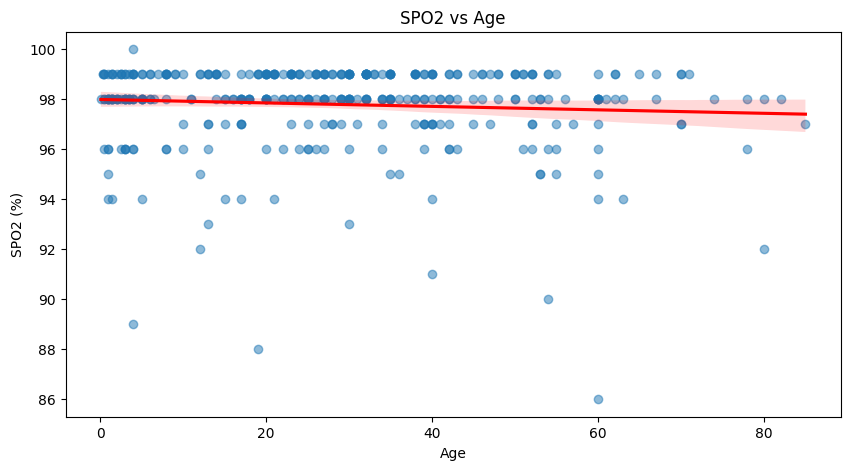

In [110]:
# Plot SPO2 vs Age
plt.figure(figsize=(10, 5))
sns.regplot(x='Age', y='SPO2 (%)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('SPO2 vs Age')
plt.xlabel('Age')
plt.ylabel('SPO2 (%)')
plt.show()


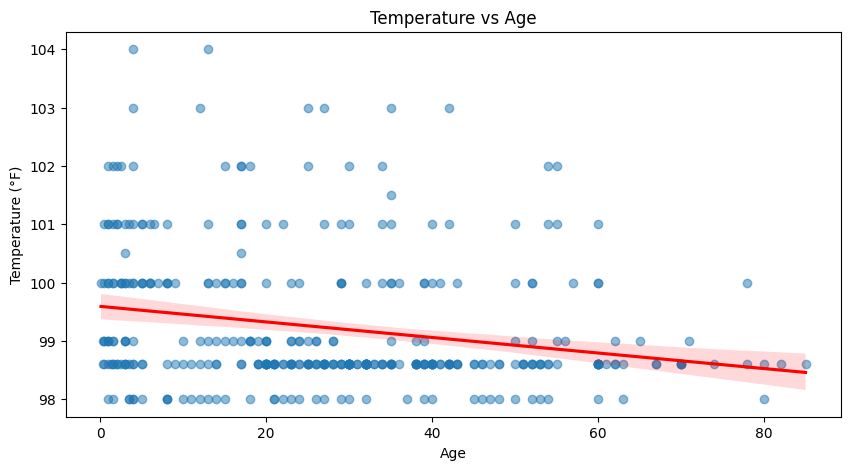

In [111]:
# Plot Temperature vs Age
plt.figure(figsize=(10, 5))
sns.regplot(x='Age', y='Temperature (°F)', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Temperature vs Age')
plt.xlabel('Age')
plt.ylabel('Temperature (°F)')
plt.show()


In [112]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


In [113]:
df.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,female,99.0,91.0,99,sore throat,fever,urti
1,24.0,female,99.0,73.0,99,cough,sore throat,urti
2,26.0,female,99.0,112.0,99,chest pain,fever,urti
3,63.0,male,98.6,92.0,98,loose motion,vomiting,age
4,39.0,female,98.0,92.0,97,breathlessness,dizziness,gad


In [114]:
df_2 = pd.get_dummies(df,columns=["Gender"],drop_first=True)

In [115]:
df_2.head()

,Age,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result,Gender_male
0,20.0,99.0,91.0,99,sore throat,fever,urti,False
1,24.0,99.0,73.0,99,cough,sore throat,urti,False
2,26.0,99.0,112.0,99,chest pain,fever,urti,False
3,63.0,98.6,92.0,98,loose motion,vomiting,age,True
4,39.0,98.0,92.0,97,breathlessness,dizziness,gad,False


In [116]:
df_2.rename(columns={'Gender_male': 'Gender'}, inplace=True)

In [117]:
df_2.head()

,Age,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result,Gender
0,20.0,99.0,91.0,99,sore throat,fever,urti,False
1,24.0,99.0,73.0,99,cough,sore throat,urti,False
2,26.0,99.0,112.0,99,chest pain,fever,urti,False
3,63.0,98.6,92.0,98,loose motion,vomiting,age,True
4,39.0,98.0,92.0,97,breathlessness,dizziness,gad,False


In [118]:
df.Diagnosis.value_counts()

Diagnosis
fever              123
loose motion       100
vomiting            23
cough               22
abdominal pain      20
epigastric pain     20
sore throat         19
headache            14
breathlessness      11
flu                  7
dysuria              6
nausea               5
chest pain           4
bodyache             2
dizziness            2
Name: count, dtype: int64

In [119]:
df.Diagnosis_2.value_counts()

Diagnosis_2
vomiting           97
sore throat        50
bodyache           41
nausea             41
cough              35
loose motion       30
fever              27
abdominal pain     17
flu                 9
epigastric pain     9
headache            7
weakness            4
breathlessness      4
chest pain          4
dizziness           3
Name: count, dtype: int64

In [120]:
# Check unique values in the Gender column
print("Unique values in 'Gender' column before mapping:", df_2['Gender'].unique())

# Define the mapping for Diagnosis and Diagnosis_2 values with unique numbers
diagnosis_mapping = {
    'fever': 1,
    'loose motion': 2,
    'vomiting': 3,
    'cough': 4,
    'abdominal pain': 5,
    'epigastric pain': 6,
    'sore throat': 7,
    'headache': 8,
    'breathlessness': 9,
    'flu': 10,
    'dysuria': 11,
    'nausea': 12,
    'chest pain': 13,
    'bodyache': 14,
    'dizziness': 15
}

diagnosis_2_mapping = {
    'vomiting': 3,
    'sore throat': 7,
    'bodyache': 14,
    'nausea': 12,
    'cough': 4,
    'loose motion': 2,
    'fever': 1,
    'abdominal pain': 5,
    'flu': 10,
    'epigastric pain': 6,
    'headache': 8,
    'weakness': 16,  # new unique value
    'breathlessness': 9,
    'chest pain': 13,
    'dizziness': 15
}

# Define the mapping for Result values with unique numbers
result_mapping = {
    'age': 17,
    'urti': 18,
    'fever': 19,
    'fd': 20,
    'hyperemic': 21,
    'gad': 22,
    'gerd': 23
}

# Apply the mappings to the Diagnosis, Diagnosis_2, and Result columns
df_2['Diagnosis'] = df_2['Diagnosis'].map(diagnosis_mapping)
df_2['Diagnosis_2'] = df_2['Diagnosis_2'].map(diagnosis_2_mapping)
df_2['Result'] = df_2['Result'].map(result_mapping)

# Apply the correct mapping to the Gender column
gender_mapping = {False: 0, True: 1}
df_2['Gender'] = df_2['Gender'].map(gender_mapping)

# Check the result
print(df_2.head())


Unique values in 'Gender' column before mapping: [False  True]
    Age  Temperature (°F)  Heart Rate (bpm)  SPO2 (%)  Diagnosis  Diagnosis_2  \
0  20.0              99.0              91.0        99          7            1   
1  24.0              99.0              73.0        99          4            7   
2  26.0              99.0             112.0        99         13            1   
3  63.0              98.6              92.0        98          2            3   
4  39.0              98.0              92.0        97          9           15   

   Result  Gender  
0      18       0  
1      18       0  
2      18       0  
3      17       1  
4      22       0  


In [121]:
# Rearrange the columns to have 'Gender' after 'Age'
columns = ['Age', 'Gender', 'Temperature (°F)', 'Heart Rate (bpm)', 'SPO2 (%)', 'Diagnosis', 'Diagnosis_2', 'Result']
df_2 = df_2[columns]

In [122]:
df_2.head()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
0,20.0,0,99.0,91.0,99,7,1,18
1,24.0,0,99.0,73.0,99,4,7,18
2,26.0,0,99.0,112.0,99,13,1,18
3,63.0,1,98.6,92.0,98,2,3,17
4,39.0,0,98.0,92.0,97,9,15,22


In [123]:
# Make a correlation matrix
df_2.corr()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
Age,1.000000,-0.138371,-0.224262,-0.213059,-0.080272,0.175211,0.092353,0.003425
Gender,-0.138371,1.000000,0.119753,0.031415,-0.092843,-0.175033,0.048989,0.095751
Temperature (°F),-0.224262,0.119753,1.000000,0.226596,-0.034026,-0.261239,0.086497,0.060405
Heart Rate (bpm),-0.213059,0.031415,0.226596,1.000000,-0.084002,-0.153727,-0.023652,-0.047564
SPO2 (%),-0.080272,-0.092843,-0.034026,-0.084002,1.000000,0.032604,0.027715,-0.041269
Diagnosis,0.175211,-0.175033,-0.261239,-0.153727,0.032604,1.000000,-0.056135,0.273773
Diagnosis_2,0.092353,0.048989,0.086497,-0.023652,0.027715,-0.056135,1.000000,0.224953
Result,0.003425,0.095751,0.060405,-0.047564,-0.041269,0.273773,0.224953,1.000000


### Correlation Matrix
It's a big table of numbers telling us how each independent variable is related to each other. Positive Correlation or Negative Correlation?


- A higher positive value means a potential positive correlation and a higher negative value means a potential negative correlation or a decrease

- Negative correlation - A relationship between two variables in which one variable increases as the other decreases

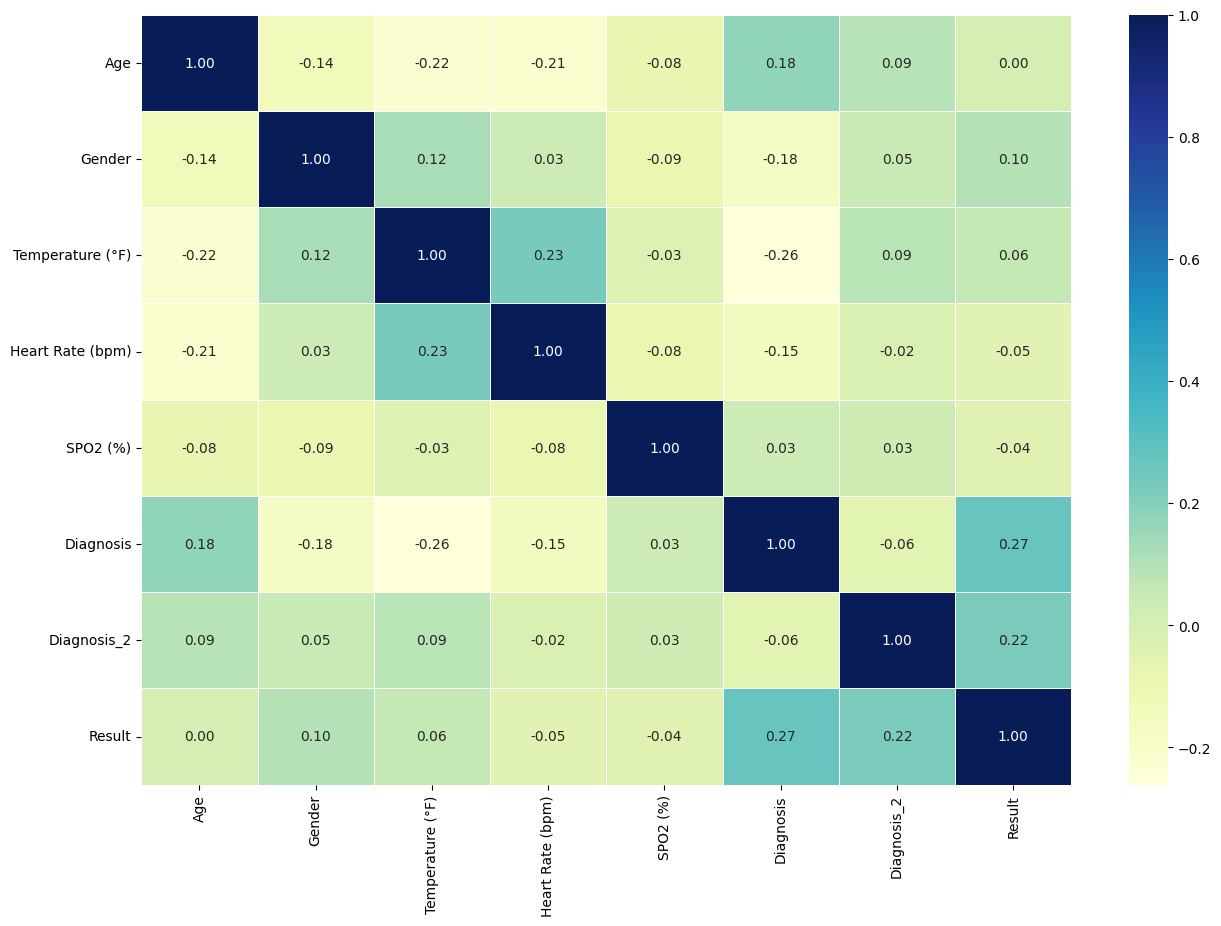

In [124]:
# Correlation matrix more visual
corr_matrix = df_2.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="YlGnBu");

## Modelling

In [125]:
df_2.tail()

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2,Result
373,60.0,0,98.6,85.0,98,2,14,17
374,32.0,1,98.6,76.0,99,5,14,20
375,65.0,0,99.0,84.0,99,15,12,20
376,13.0,0,104.0,70.0,99,2,3,17
377,31.0,0,98.6,91.0,97,2,3,17


In [126]:
# Split the data into X and y
X = df_2.drop("Result", axis=1)
y = df_2["Result"]

In [127]:
X

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2
0,20.0,0,99.0,91.0,99,7,1
1,24.0,0,99.0,73.0,99,4,7
2,26.0,0,99.0,112.0,99,13,1
3,63.0,1,98.6,92.0,98,2,3
4,39.0,0,98.0,92.0,97,9,15
...,...,...,...,...,...,...,...
373,60.0,0,98.6,85.0,98,2,14
374,32.0,1,98.6,76.0,99,5,14
375,65.0,0,99.0,84.0,99,15,12
376,13.0,0,104.0,70.0,99,2,3


In [128]:
y

0      18
1      18
2      18
3      17
4      22
       ..
373    17
374    20
375    20
376    17
377    17
Name: Result, Length: 378, dtype: int64

In [129]:
# Split data into train and tests sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [130]:
X_train

,Age,Gender,Temperature (°F),Heart Rate (bpm),SPO2 (%),Diagnosis,Diagnosis_2
137,40.0,0,98.6,126.0,97,2,3
101,1.0,1,101.0,96.0,98,1,4
314,35.0,0,101.0,101.0,99,11,12
300,29.0,0,100.0,120.0,99,8,4
223,20.0,0,98.6,95.0,99,1,15
...,...,...,...,...,...,...,...
71,8.0,0,100.0,104.0,96,1,3
106,30.0,1,98.6,60.0,99,2,6
270,40.0,1,100.0,100.0,98,1,3
348,21.0,0,98.6,92.0,99,9,3


In [131]:
y_train

137    17
101    18
314    20
300    18
223    19
       ..
71     21
106    23
270    21
348    22
102    19
Name: Result, Length: 302, dtype: int64

###Now we've got our data into training and test sets, it's time to build a machine learning model

#### We'll train it (find the patterns) on the training set.

#### And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

- Logistic Regression
- K-Nearest Neighbours Classifier
- Random Forest Classifier

In [132]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [133]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_scores

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.42105263157894735,
 'KNN': 0.3157894736842105,
 'Random Forest': 0.7105263157894737}

## Model Comparision

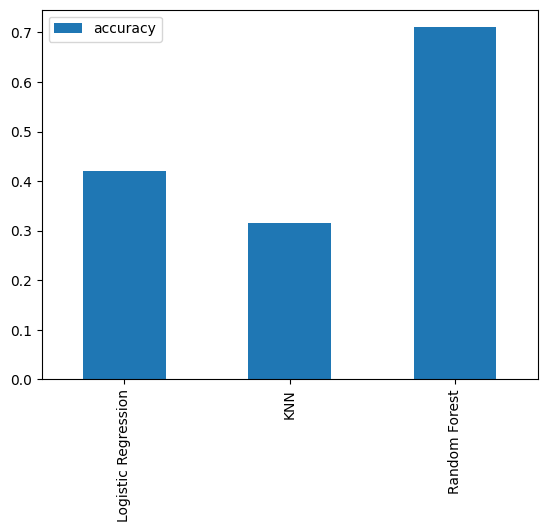

In [134]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();


Now we got a baseline model.. and we know a model's first predictions aren't always what we should based our next steps off. What should we do?

Let's look at the following:

- Hyperparameter tuning
- Feature Importance
- Confusion Matrix
- Cross-validation
-Precision
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve (AUC)

### Hyperparameter Tuning (By Hand)


In [135]:
# Let's tune K-Neighbours Classifier

train_scores = []
test_scores = []

# Create a list of different values for n_neighbours
neighbors = range(1, 21)

# Start KNN instance
knn = KNeighborsClassifier()

# loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [136]:
train_scores


[1.0,
 0.7019867549668874,
 0.652317880794702,
 0.6158940397350994,
 0.5629139072847682,
 0.5529801324503312,
 0.5033112582781457,
 0.49337748344370863,
 0.5165562913907285,
 0.5231788079470199,
 0.5099337748344371,
 0.49337748344370863,
 0.5099337748344371,
 0.49337748344370863,
 0.48344370860927155,
 0.46357615894039733,
 0.46688741721854304,
 0.4735099337748344,
 0.47019867549668876,
 0.4470198675496689]

In [137]:
test_scores

[0.2894736842105263,
 0.3684210526315789,
 0.34210526315789475,
 0.3684210526315789,
 0.3157894736842105,
 0.2894736842105263,
 0.32894736842105265,
 0.3157894736842105,
 0.3157894736842105,
 0.2631578947368421,
 0.2631578947368421,
 0.3026315789473684,
 0.27631578947368424,
 0.2894736842105263,
 0.3026315789473684,
 0.27631578947368424,
 0.25,
 0.27631578947368424,
 0.3026315789473684,
 0.3157894736842105]

Maximum KNN score on the test data: 36.84%


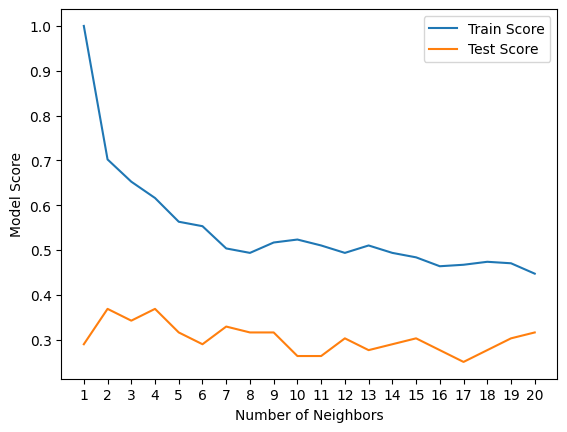

In [138]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

we're going to tune:

- LogisticRegression()
- RandomForestClassifier()
...using RandomizedSearchCV

In [139]:
# Create a hyperparameter Grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 100, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2 , 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV..



In [140]:
## Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [141]:
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': 0.08858667904100823}

In [142]:
rs_log_reg.score(X_test, y_test)


0.4473684210526316

## Now it's turn to tune RandomForestClassifier()



In [143]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparameters search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv=5,
                          n_iter=100,
                          verbose=True)

# Fit random hyperparameters search for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 60])},
                   verbose=True)

In [144]:
rs_rf.best_params_


{'n_estimators': 60,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [145]:
rs_rf.score(X_test, y_test)


0.7105263157894737

## Hyperparameters of LogisticRegression (by GridSearchCV)

Since our RandomForestClassifier model provides the best scores so far, we'll try and improve them again using GridSearchCV

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Different hyperparameters for our RandomForestClassifier Model
rf_grid = {
    'n_estimators': [50, 100, 150, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Setup grid hyperparameter search for RandomForestClassifier
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid=rf_grid,
                     cv=5,
                     verbose=True,
                     n_jobs=-1)  # Use all available CPUs for parallel processing

# Fit grid hyperparameters search for RandomForestClassifier
gs_rf.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", gs_rf.best_params_)
print("Best score:", gs_rf.best_score_)

# Get the best model
best_rf_model = gs_rf.best_estimator_

# Evaluate the best model on the test set
test_score = best_rf_model.score(X_test, y_test)
print("Test score of the best model:", test_score)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters: {'bootstrap': True, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best score: 0.6953551912568305
Test score of the best model: 0.7105263157894737


## Evaluating our tuned Machine Learning Classifier, beyond Accuracy

- ROC Curve and AUC score
- Confusion Matrix
- Classification Report
- Precision
- Recall
- F1-score

..and it would be great if you use cross-validation where possible

To make comparisions and evaluate our trained model, first we need to make predictions

In [147]:
# Make predictions with the tuned RandomForest model
y_preds = best_rf_model.predict(X_test)

# Print the predictions
print(y_preds)


[17 17 20 18 17 17 17 17 17 18 18 18 18 17 19 17 17 21 19 18 18 17 17 18
 19 17 19 20 18 17 17 18 17 18 18 17 17 23 17 19 21 19 19 17 18 17 17 17
 17 17 18 19 17 18 17 17 18 18 19 18 19 18 17 18 17 17 19 18 18 19 17 20
 20 20 19 18]


In [150]:
y_test

287    17
329    17
323    20
145    19
55     17
       ..
227    17
182    17
316    20
110    19
305    18
Name: Result, Length: 76, dtype: int64

<Figure size 640x480 with 0 Axes>

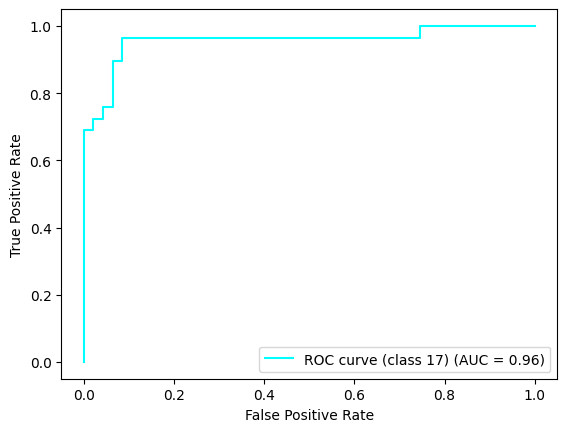

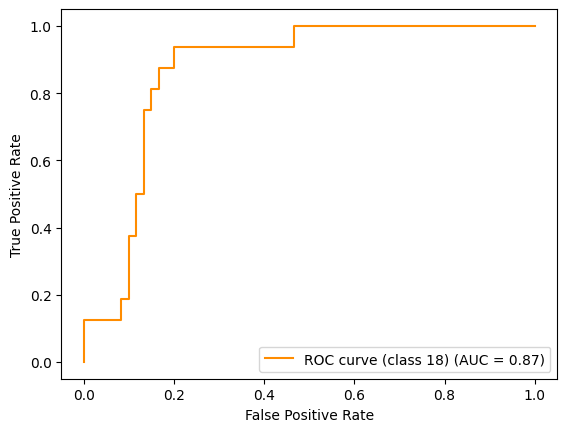

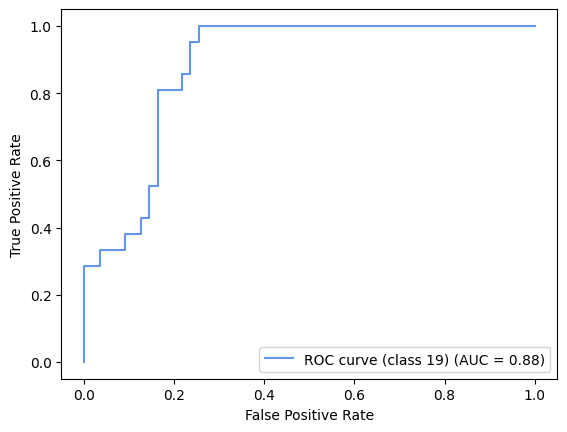

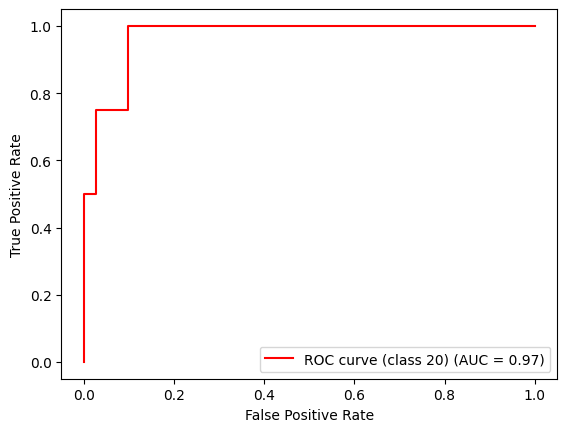

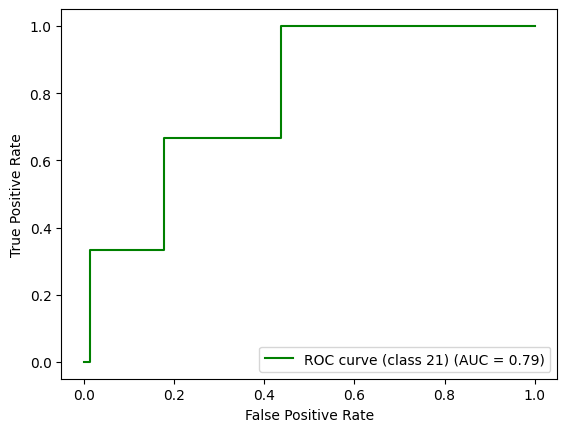

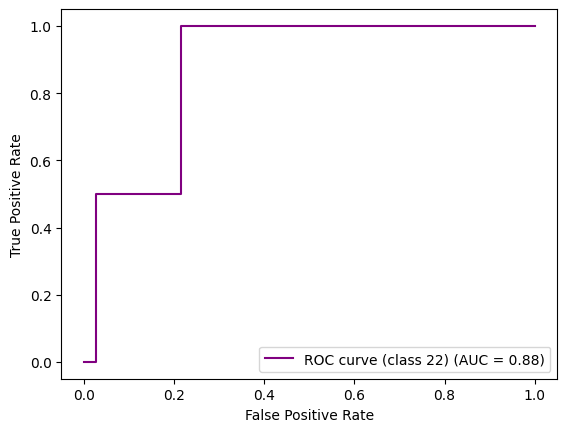

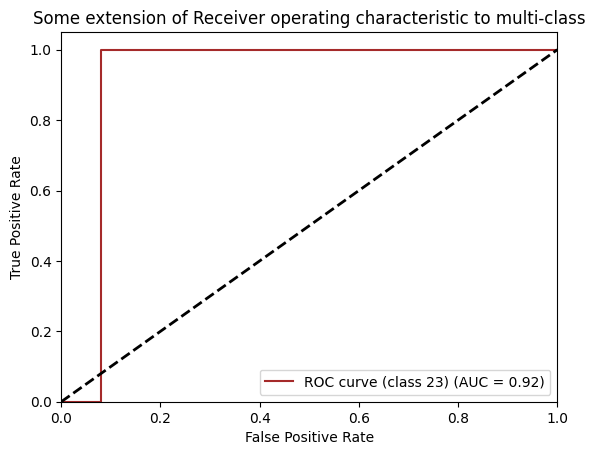

AUC score: 0.8947781819580441


In [154]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Binarize the output
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=[17, 18, 19, 20, 21, 22, 23])
n_classes = y_test_binarized.shape[1]

# Predict probabilities
y_score = best_rf_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'brown']
for i, color in zip(range(n_classes), colors):
    RocCurveDisplay(fpr=fpr[i], tpr=tpr[i], roc_auc=roc_auc[i], estimator_name=f'Class {i + 17}').plot(name=f'ROC curve (class {i + 17})', color=color)

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

# Calculate the micro-average AUC score
auc_score = roc_auc_score(y_test_binarized, y_score, multi_class='ovr')
print(f"AUC score: {auc_score}")


In [155]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[27  0  0  2  0  0  0]
 [ 1 13  2  0  0  0  0]
 [ 2  8 10  0  1  0  0]
 [ 0  0  0  3  0  0  1]
 [ 0  1  1  0  1  0  0]
 [ 1  1  0  0  0  0  0]
 [ 1  0  0  0  0  0  0]]


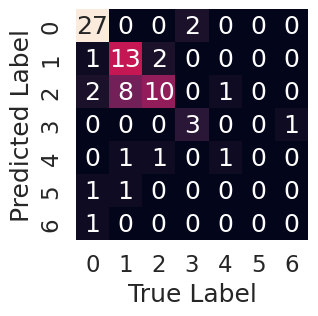

In [156]:
sns.set(font_scale=1.5)

def plot_conf_mat (y_test, y_preds):
    """
    Plots a nice confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

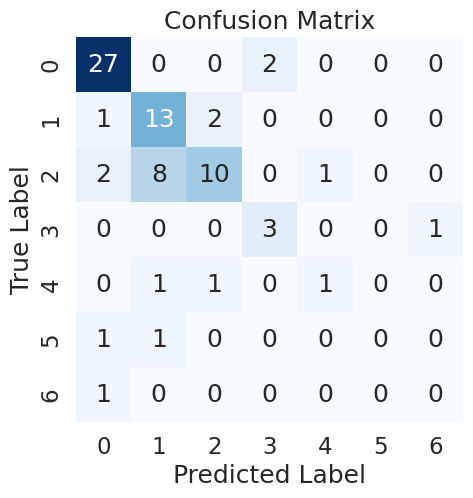

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap.

    Args:
    y_test: array-like of shape (n_samples,)
        True labels.
    y_preds: array-like of shape (n_samples,)
        Predicted labels.
    """
    # Compute confusion matrix
    conf_mat = confusion_matrix(y_test, y_preds)

    # Plot confusion matrix
    fig, ax = plt.subplots(figsize=(5, 5))  # Increase figure size for better readability
    sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    ax.set_title('Confusion Matrix')
    plt.show()

# Example usage:
# Assuming y_test and y_preds are defined
plot_conf_mat(y_test, y_preds)


Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and f1-score

In [158]:
print(classification_report(y_test, y_preds))


              precision    recall  f1-score   support

          17       0.84      0.93      0.89        29
          18       0.57      0.81      0.67        16
          19       0.77      0.48      0.59        21
          20       0.60      0.75      0.67         4
          21       0.50      0.33      0.40         3
          22       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1

    accuracy                           0.71        76
   macro avg       0.47      0.47      0.46        76
weighted avg       0.70      0.71      0.69        76



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Calculate evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall, f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`

In [163]:
# Check best hyperparameters
gs_rf.best_params_


{'bootstrap': True,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 150}

In [164]:
clf = RandomForestClassifier(bootstrap= True,
                            max_depth=30,
                            min_samples_leaf= 1,
                            min_samples_split= 5,
                            n_estimators= 150)

In [165]:
# Cross-Validated Accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.6640701754385965

In [168]:
# Cross-Validated Precision for multiclass classification
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision_macro")  # Macro precision for multiclass
cv_precision = np.mean(cv_precision)  # Average precision across folds
print(f"Cross-Validated Precision (Macro): {cv_precision}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validated Precision (Macro): 0.49969178292709254


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [170]:
# Cross-Validated Recall
cv_recall = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall_macro")
cv_recall = np.mean(cv_recall)
cv_recall

0.4308763973425628

In [172]:
# Cross-Validated F1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1_macro")
cv_f1 = np.mean(cv_f1)
cv_f1

0.4503487357378659

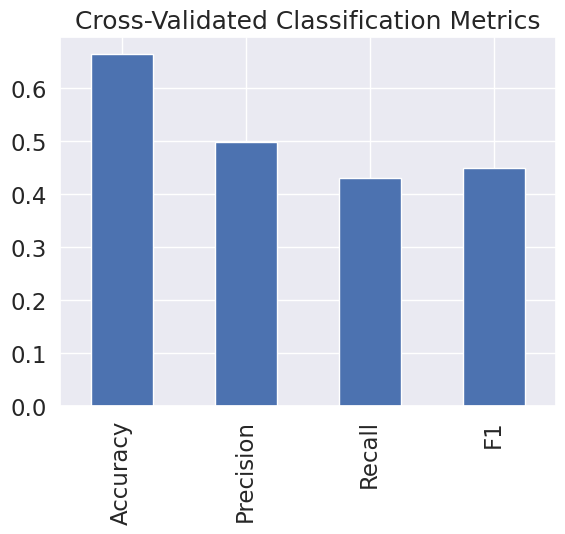

In [173]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Classification Metrics",
                     legend=False);

In [181]:
# Define the real-time parameters
real_time_data = {
    'Age': [45],
    'Gender': [1],  # 1 for male, 0 for female (assuming binary encoding for gender)
    'Temperature (°F)': [98.6],
    'Heart Rate (bpm)': [75],
    'SPO2 (%)': [95],
    'Diagnosis': [3],  # Example diagnosis code (make sure this feature exists and is encoded correctly)
    'Diagnosis_2': [1]  # Example additional diagnosis code
}

# Convert the real-time data into a DataFrame
import pandas as pd
real_time_df = pd.DataFrame(real_time_data)

# Ensure the real-time data has the same columns as the training data
real_time_df = real_time_df.reindex(columns=X_train.columns, fill_value=0)

# Define best Random Forest model (use actual best hyperparameters from GridSearchCV)
best_rf_model = RandomForestClassifier(n_estimators=50,  # Replace with the best n_estimators
                                       max_depth=10,     # Replace with the best max_depth
                                       random_state=42)  # Replace with the best random_state

# Fit the model (if not already done)
best_rf_model.fit(X_train, y_train)

# Predict the result using the trained model
result = best_rf_model.predict(real_time_df)  # For the Random Forest model
result_proba = best_rf_model.predict_proba(real_time_df)  # For probability estimates

# Print the prediction result
print(f"Predicted class: {result[0]}")
print(f"Prediction probabilities: {result_proba[0]}")


Predicted class: 17
Prediction probabilities: [0.34 0.06 0.22 0.18 0.18 0.   0.02]


In [183]:
# Define the real-time parameters
real_time_data = {
    'Age': [35],
    'Gender': [0],  # 1 for male, 0 for female (assuming binary encoding for gender)
    'Temperature (°F)': [101],
    'Heart Rate (bpm)': [89],
    'SPO2 (%)': [90],
    'Diagnosis': [2],  # Example diagnosis code (make sure this feature exists and is encoded correctly)
    'Diagnosis_2': [4]  # Example additional diagnosis code
}

# Convert the real-time data into a DataFrame
import pandas as pd
real_time_df = pd.DataFrame(real_time_data)

# Ensure the real-time data has the same columns as the training data
real_time_df = real_time_df.reindex(columns=X_train.columns, fill_value=0)

# Define best Random Forest model (use actual best hyperparameters from GridSearchCV)
best_rf_model = RandomForestClassifier(n_estimators=50,  # Replace with the best n_estimators
                                       max_depth=10,     # Replace with the best max_depth
                                       random_state=42)  # Replace with the best random_state

# Fit the model (if not already done)
best_rf_model.fit(X_train, y_train)

# Predict the result using the trained model
result = best_rf_model.predict(real_time_df)  # For the Random Forest model
result_proba = best_rf_model.predict_proba(real_time_df)  # For probability estimates

# Define result mapping
result_mapping = {
    17: 'Age',
    18: 'URTI',
    19: 'Fever',
    20: 'FD',
    21: 'Hyperemic',
    22: 'GAD',
    23: 'GERD'
}

# Get the predicted class and its corresponding result
predicted_class = result[0]
predicted_result = result_mapping.get(predicted_class, 'Unknown')

# Print the prediction result
print(f"Predicted class: {predicted_class}")
print(f"Prediction result: {predicted_result}")
print(f"Prediction probabilities: {result_proba[0]}")


Predicted class: 17
Prediction result: Age
Prediction probabilities: [0.42       0.35714286 0.02       0.06       0.04285714 0.06
 0.04      ]


In [184]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier  # Ensure RandomForestClassifier is imported

# Define result mapping
result_mapping = {
    17: 'Age',
    18: 'URTI',
    19: 'Fever',
    20: 'FD',
    21: 'Hyperemic',
    22: 'GAD',
    23: 'GERD'
}

# Define the real-time prediction function
def real_time_prediction(age, gender, temperature, heart_rate, spo2, diagnosis, diagnosis_2):
    """
    Predict the result using the trained Random Forest model with real-time parameters.

    Parameters:
    age (int): Patient's age
    gender (int): 1 for male, 0 for female
    temperature (float): Body temperature in Fahrenheit
    heart_rate (int): Heart rate in beats per minute
    spo2 (int): Blood oxygen saturation in percentage
    diagnosis (int): Diagnosis code
    diagnosis_2 (int): Additional diagnosis code

    Returns:
    None
    """
    # Define the real-time parameters
    real_time_data = {
        'Age': [age],
        'Gender': [gender],
        'Temperature (°F)': [temperature],
        'Heart Rate (bpm)': [heart_rate],
        'SPO2 (%)': [spo2],
        'Diagnosis': [diagnosis],
        'Diagnosis_2': [diagnosis_2]
    }

    # Convert the real-time data into a DataFrame
    real_time_df = pd.DataFrame(real_time_data)

    # Ensure the real-time data has the same columns as the training data
    real_time_df = real_time_df.reindex(columns=X_train.columns, fill_value=0)

    # Define best Random Forest model (use actual best hyperparameters from GridSearchCV)
    best_rf_model = RandomForestClassifier(n_estimators=50,  # Replace with the best n_estimators
                                           max_depth=10,     # Replace with the best max_depth
                                           random_state=42)  # Replace with the best random_state

    # Fit the model (if not already done)
    best_rf_model.fit(X_train, y_train)

    # Predict the result using the trained model
    result = best_rf_model.predict(real_time_df)  # For the Random Forest model
    result_proba = best_rf_model.predict_proba(real_time_df)  # For probability estimates

    # Get the predicted class and its corresponding result
    predicted_class = result[0]
    predicted_result = result_mapping.get(predicted_class, 'Unknown')

    # Print the prediction result
    print(f"Predicted class: {predicted_class}")
    print(f"Prediction result: {predicted_result}")
    print(f"Prediction probabilities: {result_proba[0]}")


In [186]:
# Example usage
real_time_prediction(age=60, gender=1, temperature=98.6, heart_rate=110, spo2=85, diagnosis=1, diagnosis_2=3)


Predicted class: 19
Prediction result: Fever
Prediction probabilities: [0.26 0.22 0.28 0.12 0.06 0.   0.06]


In [189]:
# Define result mapping
result_mapping = {
    17: 'Age',
    18: 'URTI',
    19: 'Fever',
    20: 'FD',
    21: 'Hyperemic',
    22: 'GAD',
    23: 'GERD'
}

# Function for real-time prediction with English inputs
def real_time_prediction(age, gender, temperature, heart_rate, spo2, diagnosis, diagnosis_2):
    """
    Predict the result using the trained Random Forest model with real-time parameters and visualize results.

    Parameters:
    age (int): Patient's age
    gender (int): 1 for male, 0 for female
    temperature (float): Body temperature in Fahrenheit
    heart_rate (int): Heart rate in beats per minute
    spo2 (int): Blood oxygen saturation in percentage
    diagnosis (str): Diagnosis name in English
    diagnosis_2 (str): Additional diagnosis name in English

    Returns:
    None
    """
    # Map English diagnosis names to their corresponding encoded values
    diagnosis_mapping = {
        'Age': 17,
        'URTI': 18,
        'Fever': 19,
        'FD': 20,
        'Hyperemic': 21,
        'GAD': 22,
        'GERD': 23
    }

    # Convert diagnosis and diagnosis_2 to their respective encoded values
    encoded_diagnosis = diagnosis_mapping.get(diagnosis, 0)  # Default to 0 if not found
    encoded_diagnosis_2 = diagnosis_mapping.get(diagnosis_2, 0)  # Default to 0 if not found

    # Define the real-time parameters
    real_time_data = {
        'Age': [age],
        'Gender': [gender],
        'Temperature (°F)': [temperature],
        'Heart Rate (bpm)': [heart_rate],
        'SPO2 (%)': [spo2],
        'Diagnosis': [encoded_diagnosis],
        'Diagnosis_2': [encoded_diagnosis_2]
    }

    # Convert the real-time data into a DataFrame
    real_time_df = pd.DataFrame(real_time_data)

    # Ensure the real-time data has the same columns as the training data
    real_time_df = real_time_df.reindex(columns=X_train.columns, fill_value=0)

    # Define best Random Forest model (use actual best hyperparameters from GridSearchCV)
    best_rf_model = RandomForestClassifier(n_estimators=50,  # Replace with the best n_estimators
                                           max_depth=10,     # Replace with the best max_depth
                                           random_state=42)  # Replace with the best random_state

    # Fit the model (if not already done)
    best_rf_model.fit(X_train, y_train)

    # Predict the result using the trained model
    result = best_rf_model.predict(real_time_df)
    result_proba = best_rf_model.predict_proba(real_time_df)

    # Get the predicted class and its corresponding result
    predicted_class = result[0]
    predicted_result = result_mapping.get(predicted_class, 'Unknown')

    # Print the prediction result
    print(f"Predicted class: {predicted_class} ({predicted_result})")
    print(f"Prediction probabilities: {result_proba[0]}")

    # Visualization of prediction probabilities
    plt.figure(figsize=(10, 6))
    plt.bar(result_mapping.values(), result_proba[0], color='skyblue')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.title('Prediction Probabilities for Each Class')
    plt.xticks(rotation=45)
    plt.show()


Predicted class: 17 (Age)
Prediction probabilities: [0.3  0.16 0.24 0.06 0.12 0.02 0.1 ]


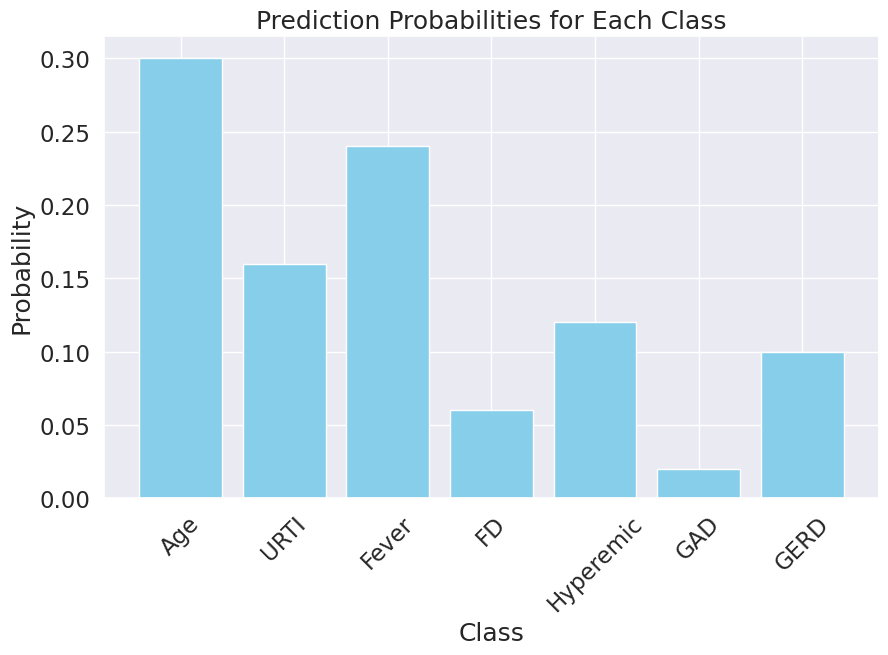

In [190]:
# Example usage with English diagnosis names
real_time_prediction(age=35, gender=0, temperature=98.6, heart_rate=95, spo2=90, diagnosis='Loose Motion', diagnosis_2='Flu')

Predicted class: 17 (Age)
Prediction probabilities: [0.3  0.16 0.24 0.06 0.12 0.02 0.1 ]


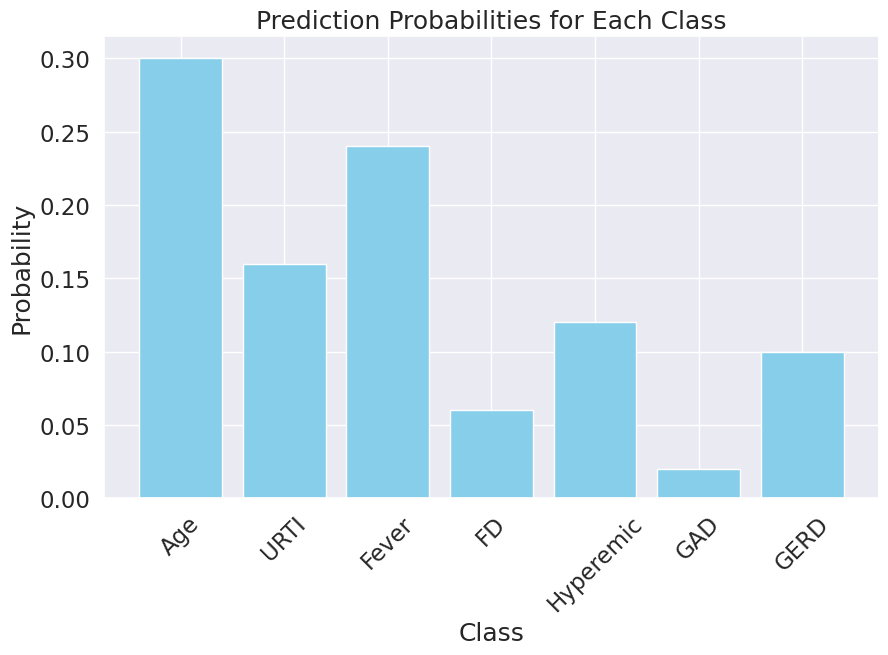

In [191]:
# Example usage with English diagnosis names
real_time_prediction(age=35, gender=0, temperature=98.6, heart_rate=95, spo2=90, diagnosis='Nausea', diagnosis_2='Vomiting')